In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [2]:
start = "2010-01-01"
end = "2019-12-31"

In [3]:
df = yf.download('AAPL', start, end)

[*********************100%***********************]  1 of 1 completed


In [7]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.454505,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.465664,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.362820,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.351057,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.393279,447610800


In [9]:
df = df.reset_index()

In [11]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.454505,493729600
1,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.465664,601904800
2,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.362820,552160000
3,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.351057,477131200
4,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.393279,447610800


In [13]:
df.drop(['Date', 'Adj Close'], axis=1, inplace=True)

In [15]:
df.head()

,Open,High,Low,Close,Volume
0,7.622500,7.660714,7.585000,7.643214,493729600
1,7.664286,7.699643,7.616071,7.656429,601904800
2,7.656429,7.686786,7.526786,7.534643,552160000
3,7.562500,7.571429,7.466071,7.520714,477131200
4,7.510714,7.571429,7.466429,7.570714,447610800


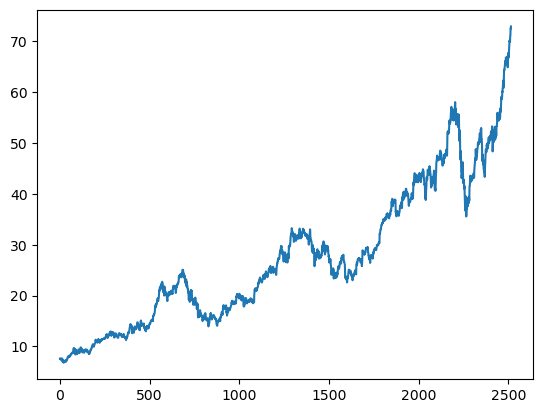

In [17]:
plt.plot(df["Close"])

In [19]:
# Using moving averages over 100 days
ma100 = df["Close"].rolling(100).mean()

In [21]:
ma100

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2510    59.201075
2511    59.401700
2512    59.643125
2513    59.875125
2514    60.106325
Name: Close, Length: 2515, dtype: float64

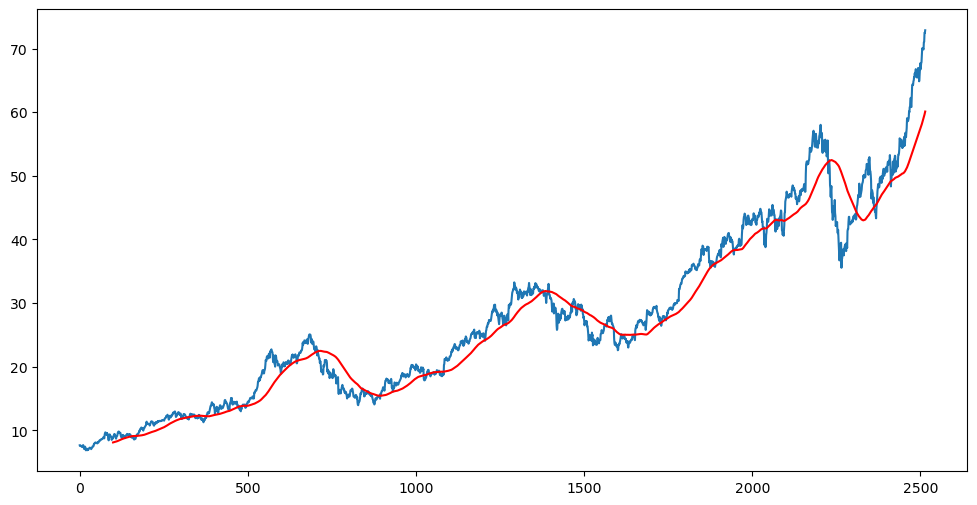

In [23]:
plt.figure(figsize=(12,6))
plt.plot(df["Close"])
plt.plot(ma100, 'r')

In [25]:
ma200 = df["Close"].rolling(200).mean()

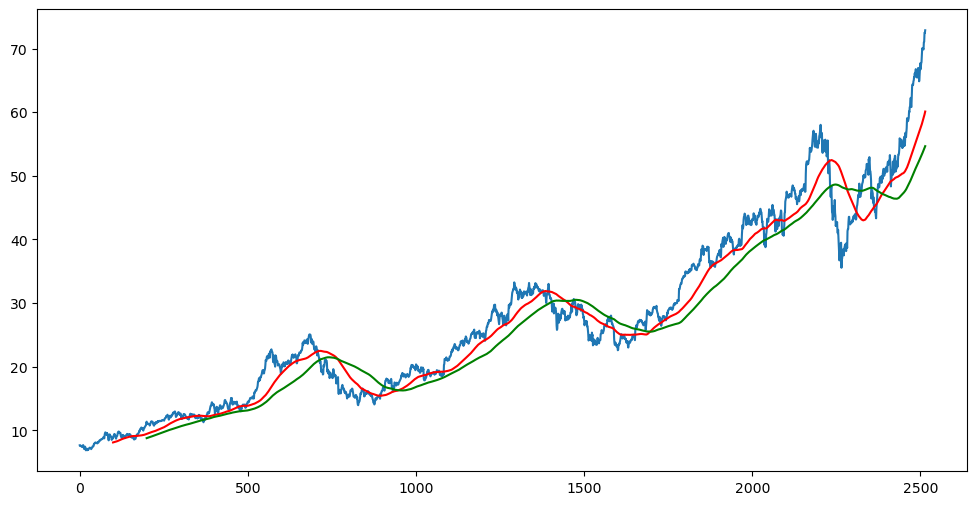

In [27]:
plt.figure(figsize=(12,6))
plt.plot(df["Close"])
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

In [29]:
df.shape

(2515, 5)

In [31]:
# Splitting the data into training and testing sets
train_data = pd.DataFrame(df["Close"][0:int(len(df)*0.70)])
test_data = pd.DataFrame(df["Close"][int(len(df)*0.70):int(len(df))])

In [33]:
print(train_data.shape)
print(test_data.shape)

(1760, 1)
(755, 1)


In [35]:
train_data.head()

,Close
0,7.643214
1,7.656429
2,7.534643
3,7.520714
4,7.570714


In [37]:
test_data.head()

,Close
1760,29.182501
1761,28.955000
1762,29.037500
1763,29.004999
1764,29.152500


In [39]:
from sklearn.preprocessing import MinMaxScaler

In [41]:
scaler = MinMaxScaler(feature_range=(0,1))

In [43]:
train_array = scaler.fit_transform(train_data)

In [45]:
train_array

array([[0.02971782],
       [0.03021854],
       [0.02560389],
       ...,
       [0.84388656],
       [0.85089656],
       [0.84616011]])

In [47]:
x_train = []
y_train = []

for i in range(100, train_array.shape[0]):
    x_train.append(train_array[i-100:i])
    y_train.append(train_array[i,0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [49]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [51]:
model = Sequential()

model.add(LSTM(units = 50, activation="relu", return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation="relu", return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation="relu", return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(units=1))

In [53]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [55]:
model.compile(optimizer="adam", loss="mean_squared_error")
model.fit(x_train, y_train, epochs=50)


Epoch 1/50

52/52 [==============================] - 17s 161ms/step - loss: 0.0693
Epoch 2/50
52/52 [==============================] - 9s 164ms/step - loss: 0.0136
Epoch 3/50
52/52 [==============================] - 9s 165ms/step - loss: 0.0117
Epoch 4/50
52/52 [==============================] - 9s 167ms/step - loss: 0.0106
Epoch 5/50
52/52 [==============================] - 8s 162ms/step - loss: 0.0098
Epoch 6/50
52/52 [==============================] - 8s 156ms/step - loss: 0.0101
Epoch 7/50
52/52 [==============================] - 8s 156ms/step - loss: 0.0085
Epoch 8/50
52/52 [==============================] - 8s 157ms/step - loss: 0.0080
Epoch 9/50
52/52 [==============================] - 8s 157ms/step - loss: 0.0079
Epoch 10/50
52/52 [==============================] - 8s 157ms/step - loss: 0.0083
Epoch 11/50
52/52 [==============================] - 8s 156ms/step - loss: 0.0072
Epoch 12/50
52/52 [==============================] - 8s 157ms/step - loss: 0.0069
Epoch 13/50
52/52 [===

In [56]:
model.save("keras_model.keras")

In [59]:
past_100_days = train_data.tail(100)

In [61]:
final_df = pd.concat([past_100_days, test_data], ignore_index=True)

In [63]:
final_df.head()

,Close
0,27.092501
1,27.202499
2,27.000000
3,26.982500
4,27.045000


In [65]:
input_data = scaler.fit_transform(final_df)

In [67]:
input_data

array([[0.02781467],
       [0.03015022],
       [0.02585064],
       [0.02547908],
       [0.02680611],
       [0.03370671],
       [0.03317586],
       [0.03232658],
       [0.03158344],
       [0.03306972],
       [0.02855781],
       [0.03036255],
       [0.02600988],
       [0.02356814],
       [0.02022403],
       [0.01958704],
       [0.01523437],
       [0.01576518],
       [0.01910933],
       [0.02441747],
       [0.02425819],
       [0.02776158],
       [0.01268645],
       [0.        ],
       [0.01226183],
       [0.02558522],
       [0.04586231],
       [0.06603324],
       [0.06258295],
       [0.05547006],
       [0.05541697],
       [0.05531082],
       [0.06099053],
       [0.05085197],
       [0.05175434],
       [0.05286905],
       [0.05743405],
       [0.04803866],
       [0.05265676],
       [0.04984341],
       [0.05239133],
       [0.05265676],
       [0.05711557],
       [0.05801795],
       [0.06858117],
       [0.0699082 ],
       [0.07542863],
       [0.073

In [69]:
input_data.shape

(855, 1)

In [71]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

In [73]:
x_test, y_test = np.array(x_test), np.array(y_test)

In [75]:
print(x_test.shape)
print(y_test.shape)

(755, 100, 1)
(755,)


In [77]:
y_pred = model.predict(x_test)

24/24 [==============================] - 3s 55ms/step


In [79]:
# Need the predictions and the test data to be in the same scale.
# So let's look at the scaler's scale
scaler.scale_

array([0.02123255])

In [81]:
# So the scale factor will be as follows:
scale_factor = 1/0.02123255
y_test = y_test * scale_factor
y_pred = y_pred * scale_factor

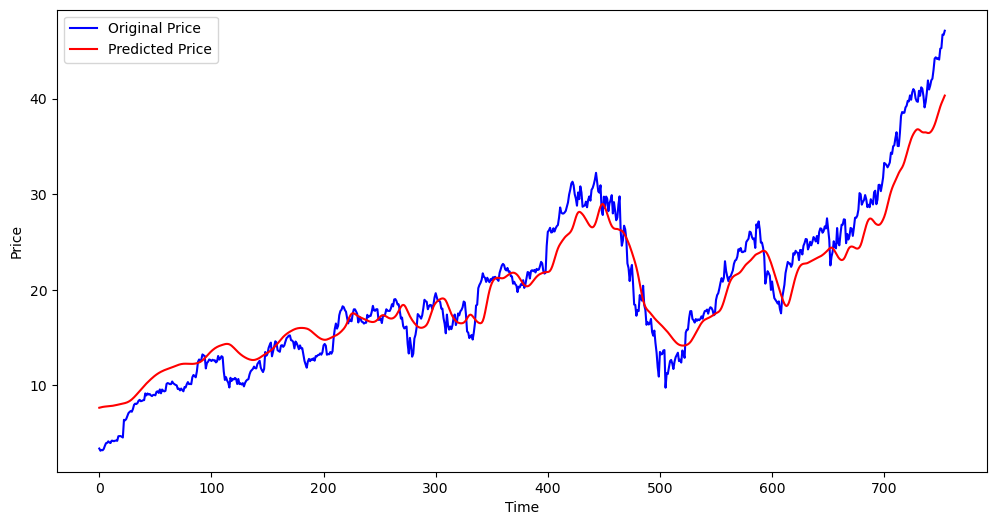

In [83]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label = "Original Price")
plt.plot(y_pred, 'r', label = "Predicted Price")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.show()